In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [3]:
df = pd.read_csv('finance-charts-apple.csv')
df.head()

,Date,AAPL.Open,AAPL.High,AAPL.Low,AAPL.Close,AAPL.Volume,AAPL.Adjusted,dn,mavg,up,direction
0,2015-02-17,127.489998,128.880005,126.919998,127.830002,63152400,122.905254,106.741052,117.927667,129.114281,Increasing
1,2015-02-18,127.629997,128.779999,127.449997,128.720001,44891700,123.760965,107.842423,118.940333,130.038244,Increasing
2,2015-02-19,128.479996,129.029999,128.330002,128.449997,37362400,123.501363,108.894245,119.889167,130.884089,Decreasing
3,2015-02-20,128.619995,129.500000,128.050003,129.500000,48948400,124.510914,109.785449,120.763500,131.741551,Increasing
4,2015-02-23,130.020004,133.000000,129.660004,133.000000,70974100,127.876074,110.372516,121.720167,133.067817,Increasing


In [5]:
df.shape

(506, 11)

In [6]:
df.describe()

,AAPL.Open,AAPL.High,AAPL.Low,AAPL.Close,AAPL.Volume,AAPL.Adjusted,dn,mavg,up
count,506.000000,506.000000,506.000000,506.000000,5.060000e+02,506.000000,506.000000,506.000000,506.000000
mean,112.935000,113.919447,111.942016,112.958340,4.317842e+07,110.459312,107.311385,112.739865,118.168345
std,11.287490,11.251892,11.263687,11.244744,1.985253e+07,10.537529,11.095804,10.595315,10.670752
min,90.000000,91.669998,89.470001,90.339996,1.147590e+07,89.008370,85.508858,94.047166,97.572721
25%,105.482500,106.349999,104.657501,105.672499,2.974240e+07,103.484803,97.011245,104.954875,111.052267
50%,112.889999,114.145001,111.800003,113.025002,3.747460e+07,110.821123,107.351628,112.799750,118.472542
75%,122.267498,123.497500,121.599998,122.179998,5.076395e+07,119.255457,114.812152,121.889416,128.515793
max,135.669998,136.270004,134.839996,135.509995,1.622063e+08,135.509995,127.289258,129.845000,138.805366


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           506 non-null    object 
 1   AAPL.Open      506 non-null    float64
 2   AAPL.High      506 non-null    float64
 3   AAPL.Low       506 non-null    float64
 4   AAPL.Close     506 non-null    float64
 5   AAPL.Volume    506 non-null    int64  
 6   AAPL.Adjusted  506 non-null    float64
 7   dn             506 non-null    float64
 8   mavg           506 non-null    float64
 9   up             506 non-null    float64
 10  direction      506 non-null    object 
dtypes: float64(8), int64(1), object(2)
memory usage: 43.6+ KB


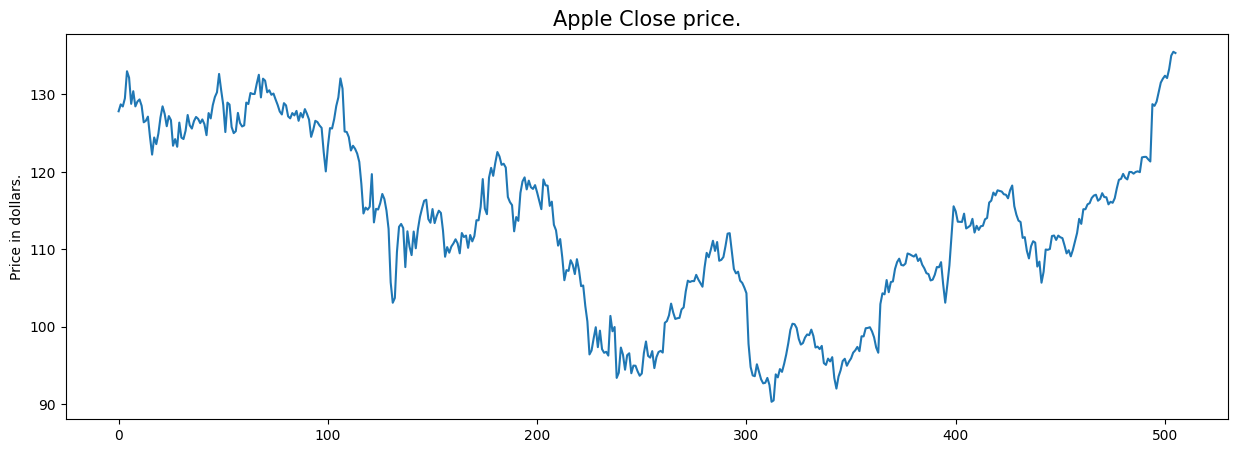

In [9]:
plt.figure(figsize=(15, 5))
plt.plot(df['AAPL.Close'])
plt.title('Apple Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

In [11]:
df[df['AAPL.Close'] == df['AAPL.Adjusted']].shape

(6, 11)

In [12]:
df = df.drop(['AAPL.Adjusted'], axis=1)

In [13]:
df.isnull().sum()

,0
Date,0
AAPL.Open,0
AAPL.High,0
AAPL.Low,0
AAPL.Close,0
AAPL.Volume,0
dn,0
mavg,0
up,0
direction,0


/tmp/ipython-input-14-2341711131.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
/tmp/ipython-input-14-2341711131.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
/tmp/ipython-input-14-2341711131.py:7: UserWarning: 

`distplot` is a deprecated function and will be remove

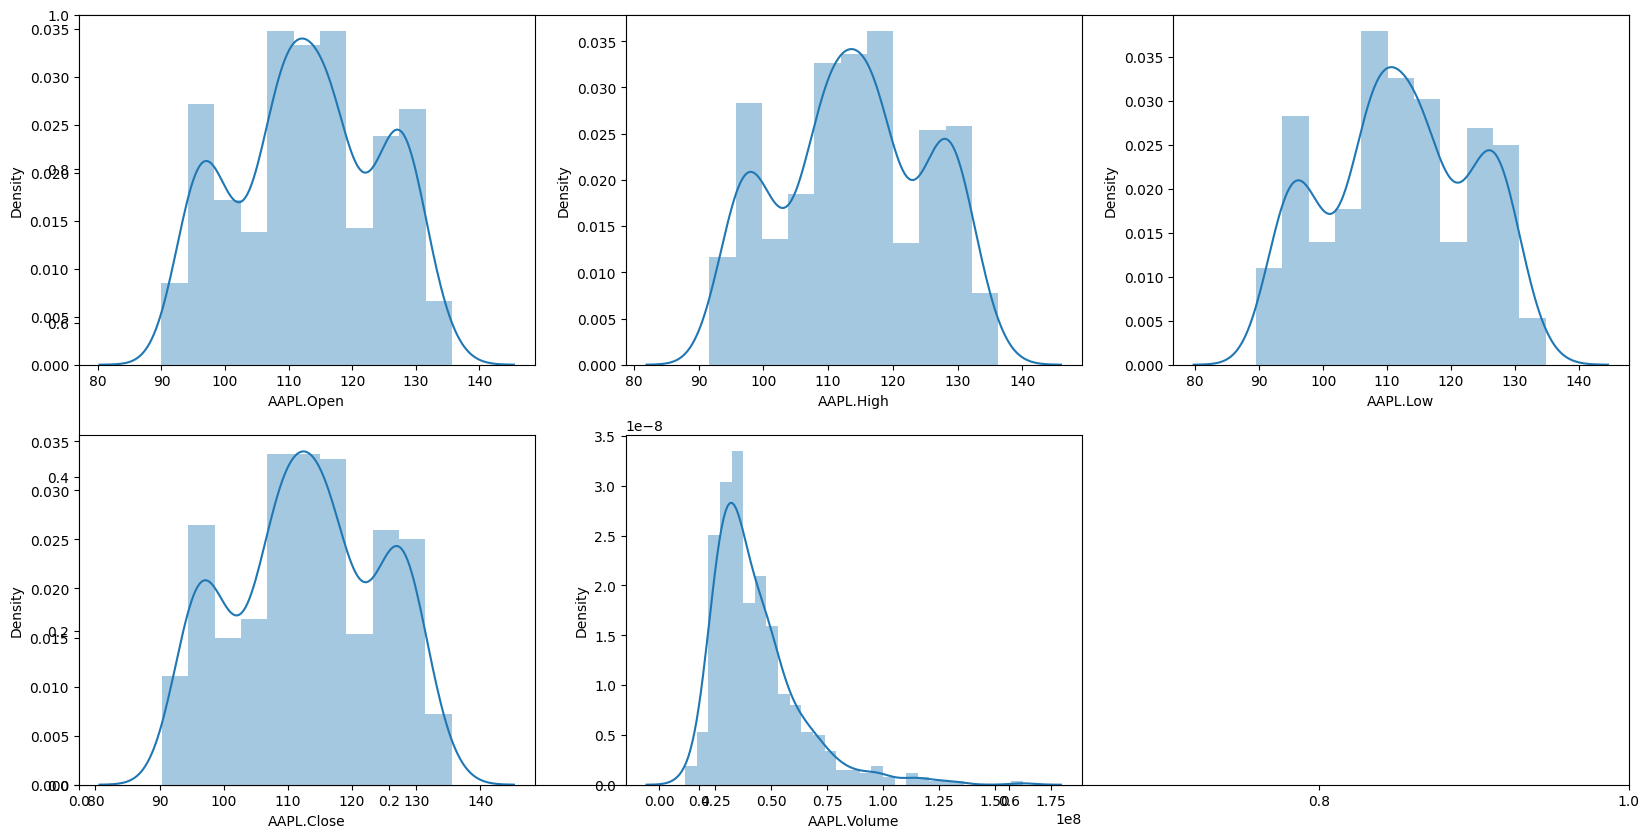

In [14]:
features = ['AAPL.Open', 'AAPL.High', 'AAPL.Low', 'AAPL.Close', 'AAPL.Volume']

plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sns.distplot(df[col])
plt.show()

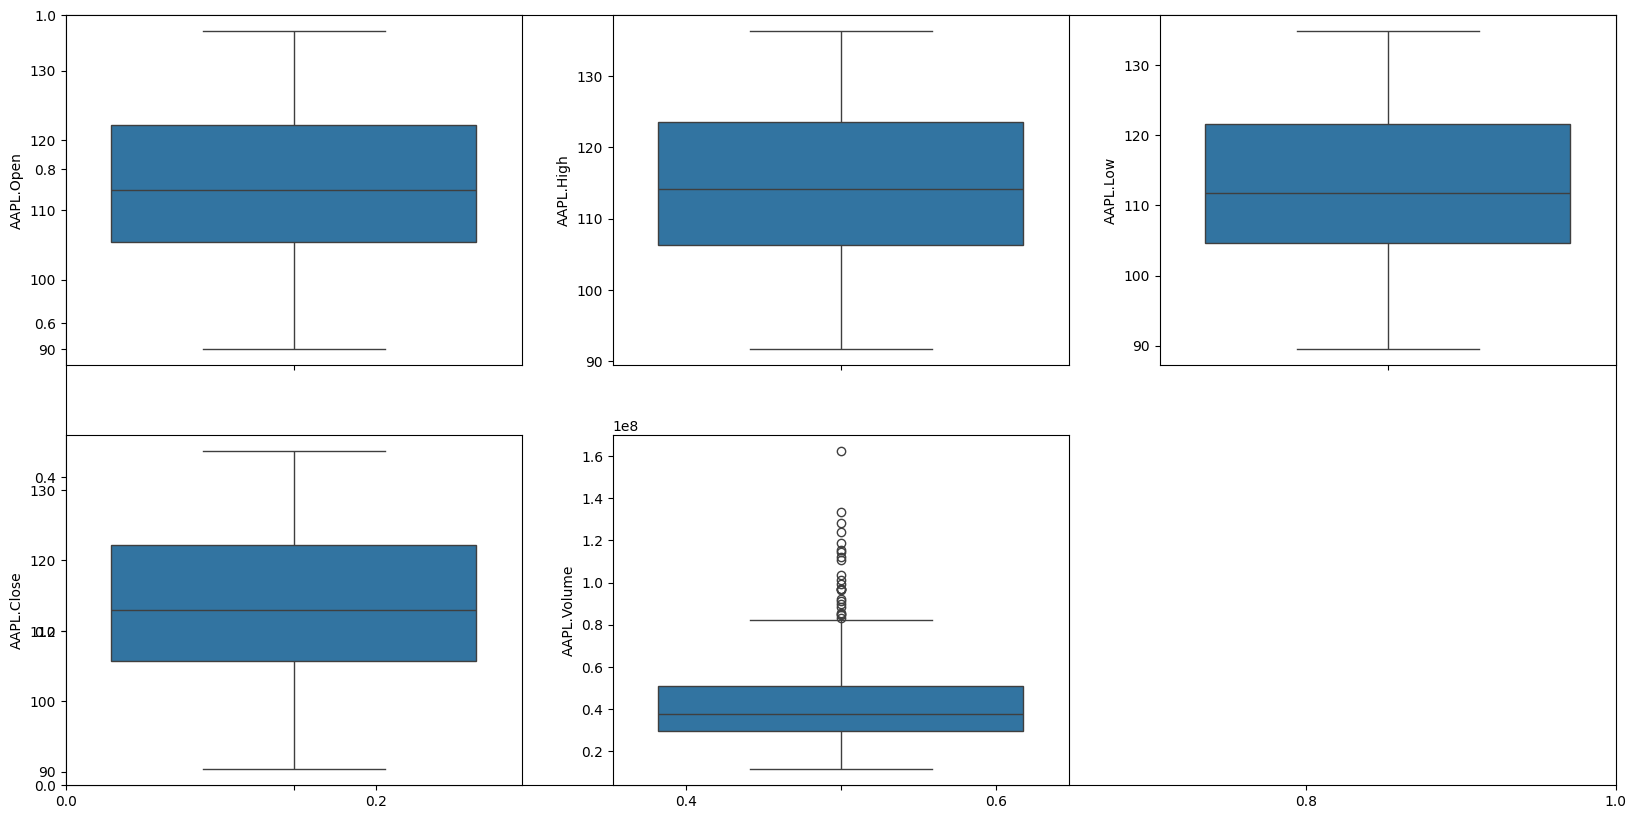

In [15]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sns.boxplot(df[col])
plt.show()

In [17]:
df['Date'] = pd.to_datetime(df['Date'])

df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

df.head()

,Date,AAPL.Open,AAPL.High,AAPL.Low,AAPL.Close,AAPL.Volume,dn,mavg,up,direction,year,month,day
0,2015-02-17,127.489998,128.880005,126.919998,127.830002,63152400,106.741052,117.927667,129.114281,Increasing,2015,2,17
1,2015-02-18,127.629997,128.779999,127.449997,128.720001,44891700,107.842423,118.940333,130.038244,Increasing,2015,2,18
2,2015-02-19,128.479996,129.029999,128.330002,128.449997,37362400,108.894245,119.889167,130.884089,Decreasing,2015,2,19
3,2015-02-20,128.619995,129.500000,128.050003,129.500000,48948400,109.785449,120.763500,131.741551,Increasing,2015,2,20
4,2015-02-23,130.020004,133.000000,129.660004,133.000000,70974100,110.372516,121.720167,133.067817,Increasing,2015,2,23


In [18]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()

,Date,AAPL.Open,AAPL.High,AAPL.Low,AAPL.Close,AAPL.Volume,dn,mavg,up,direction,year,month,day,is_quarter_end
0,2015-02-17,127.489998,128.880005,126.919998,127.830002,63152400,106.741052,117.927667,129.114281,Increasing,2015,2,17,0
1,2015-02-18,127.629997,128.779999,127.449997,128.720001,44891700,107.842423,118.940333,130.038244,Increasing,2015,2,18,0
2,2015-02-19,128.479996,129.029999,128.330002,128.449997,37362400,108.894245,119.889167,130.884089,Decreasing,2015,2,19,0
3,2015-02-20,128.619995,129.500000,128.050003,129.500000,48948400,109.785449,120.763500,131.741551,Increasing,2015,2,20,0
4,2015-02-23,130.020004,133.000000,129.660004,133.000000,70974100,110.372516,121.720167,133.067817,Increasing,2015,2,23,0


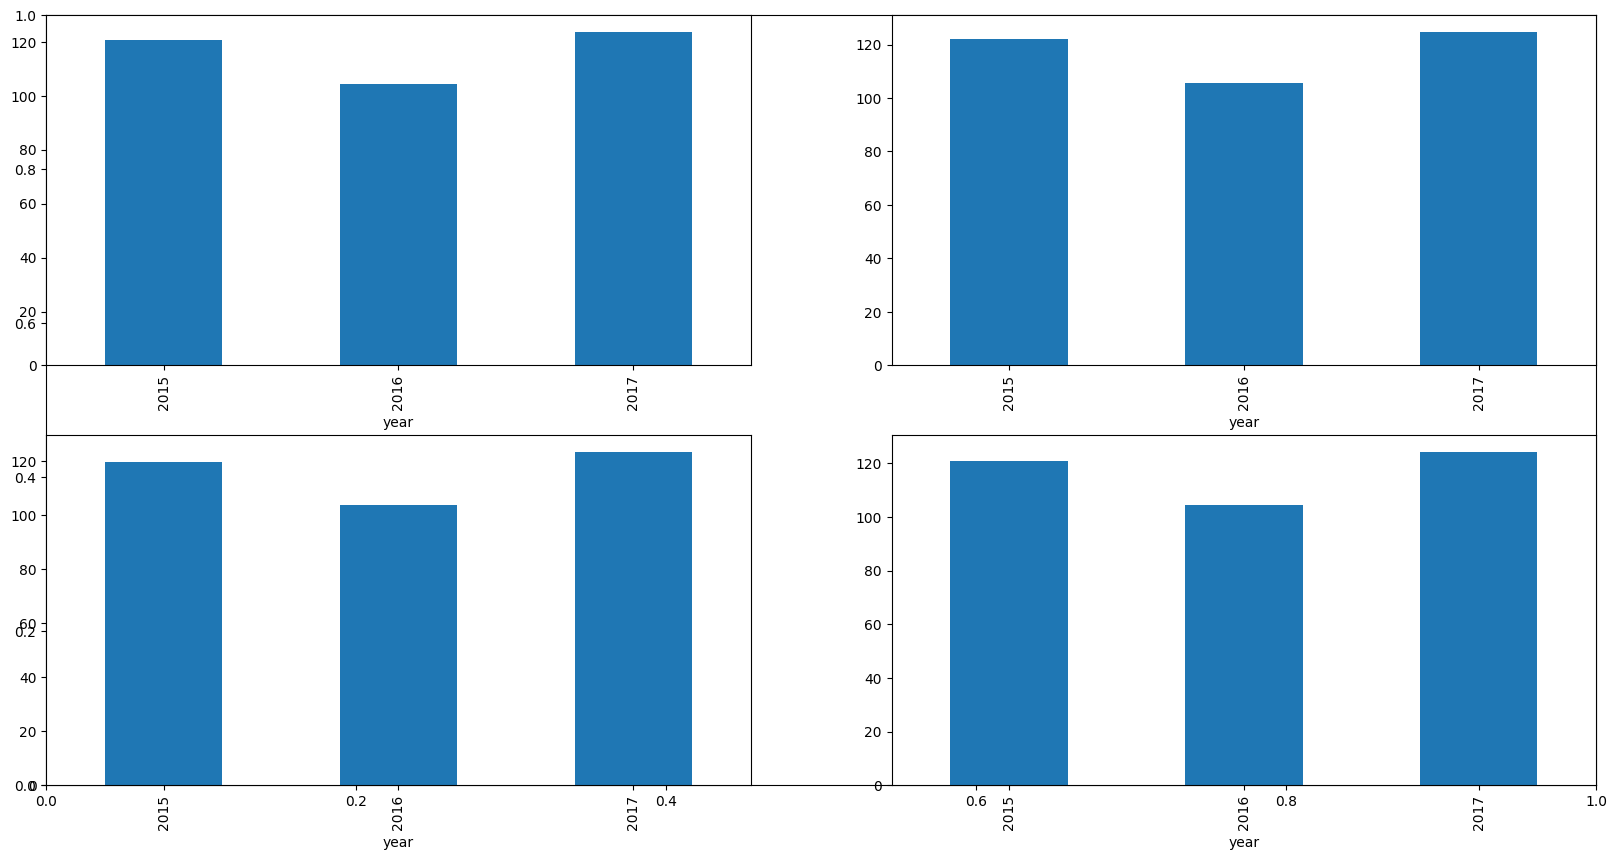

In [20]:
data_grouped = df.drop(['Date', 'direction'], axis=1).groupby('year').mean()
plt.subplots(figsize=(20,10))

for i, col in enumerate(['AAPL.Open', 'AAPL.High', 'AAPL.Low', 'AAPL.Close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()


In [22]:
df.drop(['Date', 'direction'], axis=1).groupby('is_quarter_end').mean()

,AAPL.Open,AAPL.High,AAPL.Low,AAPL.Close,AAPL.Volume,dn,mavg,up,year,month,day
is_quarter_end,,,,,,,,,,,
0,112.840270,113.836757,111.839429,112.908258,4.384732e+07,107.125654,112.779822,118.433989,2015.690691,6.069069,15.717718
1,113.117341,114.078613,112.139480,113.054740,4.189089e+07,107.668891,112.662955,117.657019,2015.497110,7.456647,15.699422


In [23]:
df['open-close']  = df['AAPL.Open'] - df['AAPL.Close']
df['low-high']  = df['AAPL.Low'] - df['AAPL.High']
df['target'] = np.where(df['AAPL.Close'].shift(-1) > df['AAPL.Close'], 1, 0)

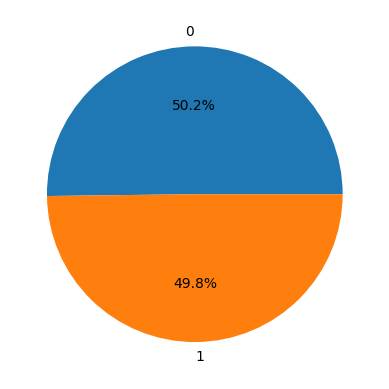

In [24]:
plt.pie(df['target'].value_counts().values,
        labels=[0, 1], autopct='%1.1f%%')
plt.show()

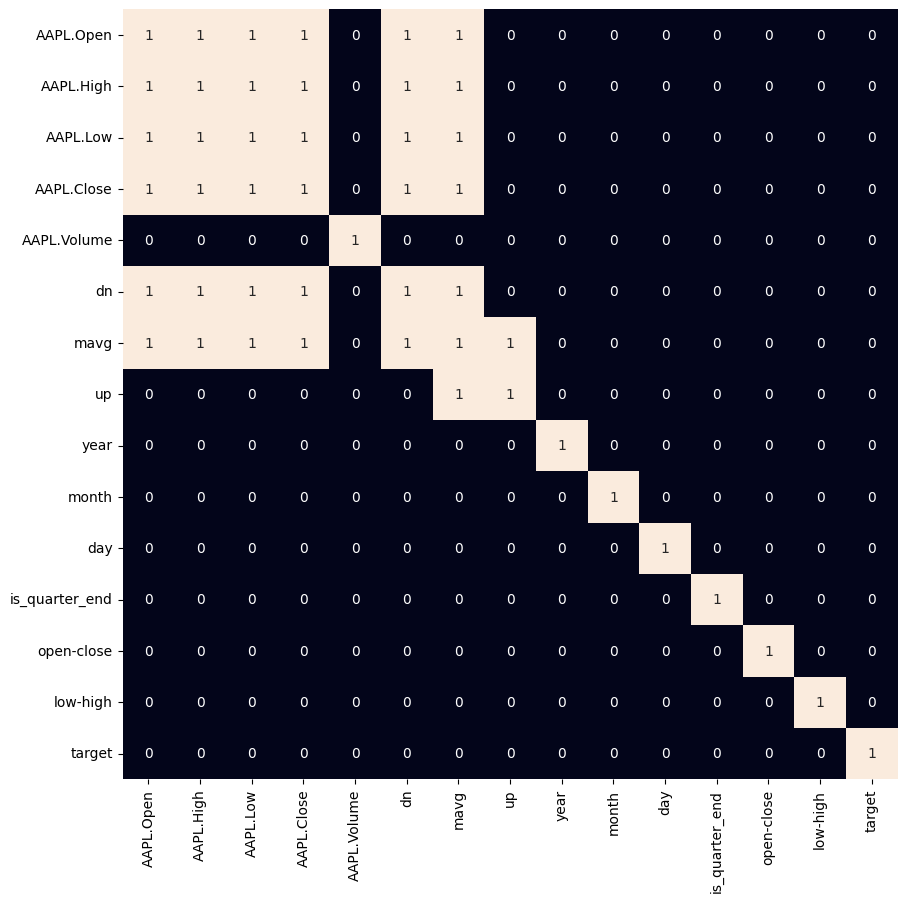

In [26]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.drop(['Date', 'direction'], axis=1).corr() > 0.9, annot=True, cbar=False)
plt.show()


In [27]:
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)

(455, 3) (51, 3)


In [28]:
models = [LogisticRegression(), SVC(
  kernel='poly', probability=True), XGBClassifier()]

for i in range(3):
  models[i].fit(X_train, Y_train)

  print(f'{models[i]} : ')
  print('Training Accuracy : ', metrics.roc_auc_score(
    Y_train, models[i].predict_proba(X_train)[:,1]))
  print('Validation Accuracy : ', metrics.roc_auc_score(
    Y_valid, models[i].predict_proba(X_valid)[:,1]))
  print()

LogisticRegression() : 
Training Accuracy :  0.5711690821256039
Validation Accuracy :  0.5216049382716049

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.5784154589371979
Validation Accuracy :  0.6118827160493827

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training 

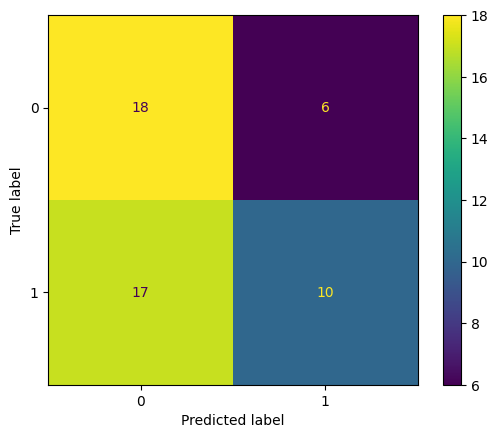

In [29]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(models[0], X_valid, Y_valid)
plt.show()